## <u>Problem Statement</u>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### <u>Step 1: Reading and Understanding the Data</u>

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [6]:
#importing dataset
df = pd.read_csv("train.csv")

In [7]:
# Check the head of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#dataset shape
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<font color = red ><b><u>*Checking for Null Values in all columns*</font></b>

In [10]:
#checking number of null values in each column
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
#calculating percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

In [12]:
#columns with all the null or missing values
print(df.columns[100*(df.isnull().sum()/len(df.index)) > 99])
print("total number of missing columns : ", len(df.columns[100*(df.isnull().sum()/len(df.index)) > 99]))

Index(['PoolQC'], dtype='object')
total number of missing columns :  1


<b><font color = "red"><u>*Removing Columns with all null values*</u></font></b>

In [13]:
#removing all the columns with all the null values
df = df.drop(df.columns[100*(df.isnull().sum()/len(df.index)) > 90], axis = 1)

In [14]:
#percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 78, dtype: float64

<b><font color = "red"><u>*Counting null values in Columns*</u></font></b>

In [15]:
#counting null values of columns
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [16]:
#Drop column Fence with high missing values
df= df.drop(columns=['Fence'])

In [17]:
#counting null values of columns
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

<font color = blue>*We can't drop other columns because the percentage of null values is not high*</font>

<b><font color = "red"><u>*Replacing null column values with NA*</u></font></b>

In [18]:
#replacing Nan values of FireplaceQu with NA 
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [19]:
#replacing Nan values of MasVnrType with None 
df.MasVnrType = df.MasVnrType.fillna('None')

In [20]:
#replacing Nan values of BsmtQual with NA 
df.BsmtQual = df.BsmtQual.fillna('NA')

In [21]:
#replacing Nan values of BsmtCond with NA 
df.BsmtCond = df.BsmtCond.fillna('NA')

In [22]:
#replacing Nan values of BsmtExposure with No
df.BsmtExposure = df.BsmtExposure.fillna('No')

In [23]:
#replacing Nan values of BsmtFinType1 with NA 
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')

In [24]:
#replacing Nan values of BsmtFinType2 with NA 
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA')

In [25]:
#replacing Nan values of GarageType with NA 
df.GarageType = df.GarageType.fillna('NA')

In [26]:
#replacing Nan values of GarageFinish with 0
df.GarageFinish = df.GarageFinish.fillna(0)

In [27]:
#replacing Nan values of GarageQual with NA 
df.GarageQual = df.GarageQual.fillna('NA')

In [28]:
#replacing Nan values of GarageCond with NA 
df.GarageCond = df.GarageCond.fillna('NA')

In [29]:
#replacing Nan values of GarageYrBlt with 0 
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

In [30]:
#replacing missing values of LotFrontage with median 
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

In [31]:
#replacing missing values of MasVnrArea with median 
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())

In [32]:
#replacing missing values of Electrical with mode 
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])    

In [33]:
#check missing values again
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

<font color = blue>*There are no missing values in columns now, however there are some columns which present flawed data and also the data which is not required for analysis, we will drop those columns*</font>

In [34]:
df=df.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond','Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType', 'SaleCondition'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrType     1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  Foundati

In [36]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
df = df.astype(convert_dict)

In [37]:
#converting ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [38]:
#converting BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [39]:
#converting BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
df = df.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [40]:
#converting BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
df = df.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [41]:
#converting HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [42]:
#converting KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [43]:
#converting FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

### <u>Step 2: Data Preparation</u>

<font color = red><b><u>*Introducing Dummy Variables*</u></b></font>

In [44]:
# Get the dummy variables for the feature 'MSSubClass' and store it in a new variable - 'MSSubClass_df'
MSSubClass_df = pd.get_dummies(df['MSSubClass'],drop_first=True, prefix='MSSubClass')

# Add the results to the original dataframe
df = pd.concat([df,MSSubClass_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [45]:
# Get the dummy variables for the feature 'MSZoning' and store it in a new variable - 'MSZoning_df'
MSZoning_df = pd.get_dummies(df['MSZoning'],drop_first=True, prefix='MSZoning')

# Add the results to the original dataframe
df = pd.concat([df,MSZoning_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
# Get the dummy variables for the feature 'LotShape' and store it in a new variable - 'LotShape_df'
LotShape_df = pd.get_dummies(df['LotShape'],drop_first=True, prefix='LotShape')

# Add the results to the original dataframe
df = pd.concat([df,LotShape_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
# Get the dummy variables for the feature 'LotConfig' and store it in a new variable - 'LotConfig_df'
LotConfig_df = pd.get_dummies(df['LotConfig'],drop_first=True, prefix='LotConfig')

# Add the results to the original dataframe
df = pd.concat([df,LotConfig_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [48]:
# Get the dummy variables for the feature 'Neighborhood' and store it in a new variable - 'Neighborhood_df'
Neighborhood_df = pd.get_dummies(df['Neighborhood'],drop_first=True, prefix='Neighborhood')

# Add the results to the original dataframe
df = pd.concat([df,Neighborhood_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
# Get the dummy variables for the feature 'HouseStyle' and store it in a new variable - 'HouseStyle_df'
HouseStyle_df = pd.get_dummies(df['HouseStyle'],drop_first=True, prefix='HouseStyle')

# Add the results to the original dataframe
df = pd.concat([df,HouseStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
# Get the dummy variables for the feature 'RoofStyle' and store it in a new variable - 'RoofStyle_df'
RoofStyle_df = pd.get_dummies(df['RoofStyle'],drop_first=True, prefix='RoofStyle')

# Add the results to the original dataframe
df = pd.concat([df,RoofStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [51]:
# Get the dummy variables for the feature 'Exterior1st_df' and store it in a new variable - 'Exterior1st_df_df'
Exterior1st_df = pd.get_dummies(df['Exterior1st'],drop_first=True, prefix='Exterior1st')

# Add the results to the original dataframe
df = pd.concat([df,Exterior1st_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
# Get the dummy variables for the feature 'Exterior2nd' and store it in a new variable - 'Exterior2nd_df'
Exterior2nd_df = pd.get_dummies(df['Exterior2nd'],drop_first=True, prefix='Exterior2nd')

# Add the results to the original dataframe
df = pd.concat([df,Exterior2nd_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2

In [53]:
# Get the dummy variables for the feature 'MasVnrType' and store it in a new variable - 'MasVnrType_df'
MasVnrType_df = pd.get_dummies(df['MasVnrType'],drop_first=True, prefix='MasVnrType')

# Add the results to the original dataframe
df = pd.concat([df,MasVnrType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1

In [54]:
# Get the dummy variables for the feature 'Foundation' and store it in a new variable - 'Foundation_df'
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation')

# Add the results to the original dataframe
df = pd.concat([df,Foundation_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,

In [55]:
# Get the dummy variables for the feature 'GarageType' and store it in a new variable - 'GarageType_df'
GarageType_df = pd.get_dummies(df['GarageType'],drop_first=True, prefix='GarageType')

# Add the results to the original dataframe
df = pd.concat([df,GarageType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [56]:
# Get the dummy variables for the feature 'GarageFinish' and store it in a new variable - 'GarageFinish_df'
GarageFinish_df = pd.get_dummies(df['GarageFinish'],drop_first=True, prefix='GarageFinish')

# Add the results to the original dataframe
df = pd.concat([df,GarageFinish_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2

In [57]:
# Get the dummy variables for the feature 'Foundation' and store it in a new variable - 'Foundation_df'
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation')

# Add the results to the original dataframe
df = pd.concat([df,Foundation_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,

In [58]:
# Get the dummy variables for the feature 'Foundation' and store it in a new variable - 'Foundation_df'
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation')

# Add the results to the original dataframe
df = pd.concat([df,Foundation_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0

<font color = blue>*Removing the variables which are used to create dummy variables as they are no longer needeed*</font>

In [59]:
# Removing the columns used to create dummy variables as it is no longer needed.
df.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle' , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','GarageType', 'GarageFinish'], axis=1,inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 160 entries, LotFrontage to Foundation_Wood
dtypes: float64(3), int64(40), uint8(117)
memory usage: 657.4 KB


### <u>Step 3: Splitting the Data into Training and Testing Sets</u>

<font color = red><u><b>*Splitting the Dataset*</u></font>

<font color = blue>*Before building the model we need to split the dataset into training and test sets*</font>

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [62]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 160)
(439, 160)


In [63]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1

<font color = red><u><b>*Scaling the Variables*</u></b></font>

<font color = blue>*It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become an issue at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.*

In [64]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'YearBuilt']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
318,0.925326,-0.057261,0.648310,-0.532073,0.715324,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,0.882411,260000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-0.868511,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,1.629460,113000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
986,-0.478677,-0.502762,-0.066511,2.216221,-2.023391,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.15

In [65]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00

### <u>Step 4: Building a linear model</u>

<font color = red><u><b>*Using Recursive Feature Elimination Technique*</u></b></font>

<font color = blue>*Before fitting the regression line , We will use RFE to get the best n features*</font>

<font color = red><u><b>*Dividing into X and y sets for the model building*</u></b></font>

In [66]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [67]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=35)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [68]:
#List of variables selected in top 35 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 57),
 ('LotArea', False, 53),
 ('OverallQual', True, 1),
 ('OverallCond', False, 93),
 ('YearBuilt', False, 104),
 ('YearRemodAdd', False, 96),
 ('MasVnrArea', False, 73),
 ('ExterQual', False, 67),
 ('BsmtQual', False, 66),
 ('BsmtExposure', False, 38),
 ('BsmtFinType1', False, 95),
 ('BsmtFinSF1', False, 8),
 ('BsmtFinSF2', False, 9),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 123),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 23),
 ('GrLivArea', False, 17),
 ('BsmtFullBath', False, 84),
 ('BsmtHalfBath', False, 110),
 ('FullBath', False, 83),
 ('HalfBath', False, 81),
 ('BedroomAbvGr', False, 94),
 ('KitchenAbvGr', False, 68),
 ('KitchenQual', False, 32),
 ('TotRmsAbvGrd', False, 74),
 ('Fireplaces', False, 91),
 ('FireplaceQu', False, 69),
 ('GarageYrBlt', False, 48),
 ('GarageCars', False, 37),
 ('GarageArea', False, 122),
 ('WoodDeckSF', False, 98),
 ('OpenPorchSF', False, 121),
 ('EnclosedPorch', 

In [69]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_FV', 'LotConfig_FR3', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Stone', 'GarageType_CarPort', 'GarageType_NA', 'GarageFinish_Fin', 'Foundation_PConc', 'Foundation_Stone', 'Foundation_CBlock', 'Foundation_Stone'], dtype='object')

In [70]:
# columns rejected 
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'Foundation_CBlock', 'Foundation_Slab', 'Foundation_Wood', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Wood'], dtype='object', length=124)

<font color = red><u><b>*Building the model*</u></b></font>


<font color = blue>*Building model using statsmodel, for the detailed statistics*</font>


In [71]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

<font color = blue>*While fitting a regression line in statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if this step is not performed, statsmodels fits a regression line passing through the origin by default.*</font>

<font color = blue><u><b>*Iteration 1*</u></b></font>

In [72]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [73]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [74]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     143.0
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:07:42   Log-Likelihood:                -12123.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     991   BIC:                         2.445e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.586e+05 

<font color = blue><u><b>*Iteration 2*</u></b></font>

<font color = blue>*Variable '\'GarageType_NA'\' , '\'Exterior1st_CBlock'\', '\'Exterior2nd_CBlock'\', '\'Exterior1st_AsphShn'\' can be dropped due to high p value, so it is insignificant as compared to others*</font>

In [75]:
X_train_rfe = X_train_rfe.drop(["GarageType_NA","Exterior1st_CBlock","Exterior2nd_CBlock","Exterior1st_AsphShn"], axis = 1)

In [78]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [79]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [80]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     153.2
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:41:36   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     993   BIC:                         2.444e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.578e+05 

<font color = blue>*Calculating VIF*</font>

In [81]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [82]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Foundation_CBlock,inf
23,Foundation_CBlock,inf
25,Foundation_PConc,inf
26,Foundation_PConc,inf
27,Foundation_PConc,inf
28,Foundation_Stone,inf
29,Foundation_Stone,inf
30,Foundation_Stone,inf
33,Foundation_PConc,inf
34,Foundation_PConc,inf


<font color = blue><u><b>*Iteration 2*</u></b></font>

<font color = blue>*Dropping the variable with infinite VIF and very high VIF*</font>

In [83]:
X_train_rfe = X_train_rfe.drop(["Foundation_CBlock","Foundation_PConc","Foundation_Stone"], axis = 1)

<font color = blue>*Rebuilding the model"*</font>

In [84]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [85]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [86]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     170.7
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:47:15   Log-Likelihood:                -12131.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     996   BIC:                         2.443e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.676e+05 

<font color = blue>*Recalculating VIF*</font>

In [87]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Exterior2nd_CmentBd,19.14
14,Exterior1st_CemntBd,19.01
2,TotalBsmtSF,3.79
3,1stFlrSF,3.57
0,OverallQual,2.37
16,Exterior2nd_Brk Cmn,1.81
13,Exterior1st_BrkComm,1.74
4,2ndFlrSF,1.61
23,GarageFinish_Fin,1.56
21,Exterior2nd_VinylSd,1.53


<font color = blue>*Variable '\'GarageType_CarPort'\', '\'Exterior2nd_Brk Cmn'\', '\'Exterior2nd_AsphShn'\', '\'Exterior1st_CemntBd'\' , '\'LotConfig_FR3'\', '\'Exterior1st_BrkComm'\' can be dropped due to high p value, so it is insignificant as compared to others*</font>

<font color = blue><u><b>*Iteration 3|*</u></b></font>

In [88]:
X_train_rfe = X_train_rfe.drop(['GarageType_CarPort','Exterior2nd_Brk Cmn','Exterior2nd_AsphShn','Exterior1st_CemntBd','LotConfig_FR3','Exterior1st_BrkComm'],axis=1)

<font color = blue>*Rebuilding the model*</font>

In [90]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [91]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [92]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.5
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:56:44   Log-Likelihood:                -12135.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                    1002   BIC:                         2.440e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.674e+05 

<font color = blue>*Recalculating VIF*</font>

In [94]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalBsmtSF,3.66
3,1stFlrSF,3.45
0,OverallQual,2.33
4,2ndFlrSF,1.60
17,GarageFinish_Fin,1.56
16,Exterior2nd_VinylSd,1.53
9,Neighborhood_NridgHt,1.35
1,BsmtUnfSF,1.34
5,MSSubClass_120,1.33
6,MSSubClass_160,1.33


<font color = blue>*As we can observe :*
    
<font color = blue>- *All the VIF values are under 5*
    
<font color = blue>- *F-Statistics is 226.5 i.e greater than 1 and prob(F-Statistics) is very low which indicates model is significant.*
    
<font color = blue>- *R-squared value is 0.803 and adjusted R squared value is 0.799 which is a good number.*

### <u>Step 5: Residual Analysis of the train data</u>

<font color = blue>*Now we need to check whether the error terms are normally distributed or not*

In [95]:
y_train_cnt = lm.predict(X_train_lm)

In [96]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

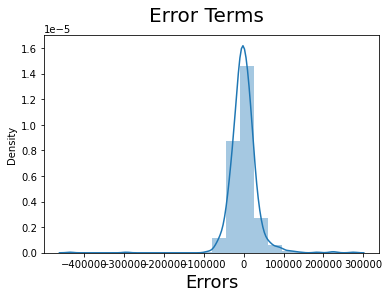

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<font color = blue>*Here we can easily observe that the error terms are normally distributed*

### <u>Step 6: Making Predictions</u>

<font color = blue>*Now we have the trained model with us, we need to make predictions using the model and we can do that by testing it with the test sets we created in the beginning*

In [99]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.010600,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,-0.611688,120500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
57,0.880036,0.112107,0.648310,-0.532073,1.078286,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,-1.358737,196500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.781317,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.3813

<font color = red><u><b>*Dividing into X_test and y_test*

In [100]:
y_test = df_test.pop('SalePrice')
X_test = df_test
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_rfe.columns]

In [101]:
# Adding a constant variable 
X_test = sm.add_constant(X_test)
# Making predictions
y_pred = lm.predict(X_test)

In [102]:
# calculating R-square score on test set

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8192

<font color = blue>*R squared value for test data set is 0.8192 and 0.806 for trained data set*

### <u>Step 7: Model Evaluation</u>

<font color = blue>*Understanding the spread between actual and predicted values*

Text(0, 0.5, 'y_pred')

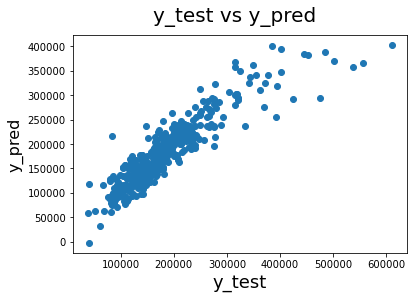

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

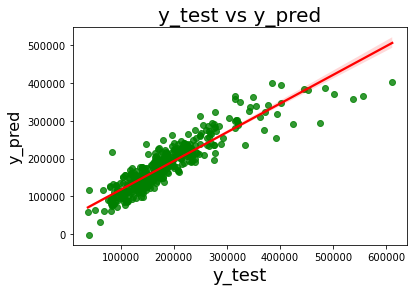

In [104]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [105]:
# Coefficients of the model

round(lm.params,4)

const                   167391.4043
OverallQual              30628.4858
BsmtUnfSF                -7862.8664
TotalBsmtSF              10163.3333
1stFlrSF                 21323.4064
2ndFlrSF                 17323.0030
MSSubClass_120          -21178.3353
MSSubClass_160          -32850.7939
MSZoning_FV              28097.7806
Neighborhood_NoRidge     59410.9821
Neighborhood_NridgHt     55936.6745
Neighborhood_OldTown    -14861.5380
Neighborhood_StoneBr     36866.3919
Exterior2nd_BrkFace      21892.7352
Exterior2nd_CmentBd      16913.9126
Exterior2nd_ImStucc      27229.6396
Exterior2nd_Plywood       7408.7265
Exterior2nd_VinylSd      13653.8152
GarageFinish_Fin         15602.2069
dtype: float64

<font color = blue>*1. Significant Variables that are important in predicting the demand for Shared Bikes are :*

- <font color = blue>OverallQual
- <font color = blue>BsmtUnfSF 
- <font color = blue>TotalBsmtSF
- <font color = blue>1stFlrSF
- <font color = blue>2ndFlrSF
- <font color = blue>MSSubClass_120
- <font color = blue>MSSubClass_160
- <font color = blue>MSZoning_FV
- <font color = blue>Neighborhood_NoRidge
- <font color = blue>Neighborhood_NridgHt
- <font color = blue>Neighborhood_OldTown
- <font color = blue>Neighborhood_StoneBr
- <font color = blue>Exterior2nd_BrkFace
- <font color = blue>Exterior2nd_CmentBd
- <font color = blue>Exterior2nd_ImStucc
- <font color = blue>Exterior2nd_Plywood
- <font color = blue>Exterior2nd_VinylSd
- <font color = blue>GarageFinish_Fin
    
    
<font color = blue>*2.There is 81.92% of the variance in the dependent variable that is explained by the independent variables listed above*   


### <u>Step 8 : Ridge Regression</u>

In [106]:
# list of alphas to tune - too high value lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [108]:
#Fitting Ridge model for alpha = 20 and printing penalised coefficients 
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 32070.96052275  -7787.76245861  11152.18459244  21935.19407169
  17823.52167815 -14110.02685288 -22568.15080404  17406.89921097
  42562.48711017  41339.72559273 -13734.41815853  15613.19645148
  11367.18191267  11856.26805169  11477.10242579   4715.59095041
  12748.73806997  15164.46686485]


In [114]:
#Calculating R2 score, RSS and RMSE
X_test_new = X_test.drop(['const'], axis=1)
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

# R squared for train set
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

# R squared for test set
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

# RSS for training data
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

# RSS for testing data
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)


# RMSE for train set
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)


# RMSE for test set
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7988249718454511
0.8106124141192337
1283870161714.3281
535157262663.3976
1257463429.690821
1219037044.7913384


### <u>Step 9 : Lasso Regression</u>

In [115]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [117]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=100)

In [118]:
lasso.coef_

array([ 31332.92580085,  -7749.18663636,  10346.56793941,  21723.0858845 ,
        17309.77918627, -16954.94364853, -27785.35318245,  22831.06480537,
        55461.38172117,  50889.95542101, -14016.0994897 ,  24527.7657771 ,
        13141.74321031,  12926.64557155,  12521.18461974,   4935.37198613,
        12414.77748625,  15339.43173213])

In [120]:
#Calculating R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)


# R squared for train set
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

# R squared for test set
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

# RSS for training data
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

# RSS for testing data
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)


# RMSE for train set
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)


# RMSE for test set
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8016675582323192
0.8148745023141917
1265729183295.3193
523113772901.19257
1239695576.1952198
1191603127.3375685


<font color = red><b>*Comparing the metrics of Ridge and Lasso Regression*

In [125]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat( [rg_metric, ls_metric], axis = 1)

final_metric

,Ridge Regression,Lasso Regression
0,7.988250e-01,8.016676e-01
1,8.106124e-01,8.148745e-01
2,1.283870e+12,1.265729e+12
3,5.351573e+11,5.231138e+11
4,3.546073e+04,3.520931e+04
5,3.491471e+04,3.451960e+04


<font color = red><b>*Comparing changes in coefficients after regularization*

In [126]:
betas = pd.DataFrame(index=X.columns)

In [127]:
betas.rows = X.columns

In [128]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [129]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,30628.485773,32070.960523,31332.925801
BsmtUnfSF,-7862.866391,-7787.762459,-7749.186636
TotalBsmtSF,10163.333317,11152.184592,10346.567939
1stFlrSF,21323.406411,21935.194072,21723.085885
2ndFlrSF,17323.003012,17823.521678,17309.779186
MSSubClass_120,-21178.335272,-14110.026853,-16954.943649
MSSubClass_160,-32850.793890,-22568.150804,-27785.353182
MSZoning_FV,28097.780568,17406.899211,22831.064805
Neighborhood_NoRidge,59410.982064,42562.487110,55461.381721
Neighborhood_NridgHt,55936.674541,41339.725593,50889.955421
